## Importing and EDA of Billboard top 100 charts from 1958-2021

In [1]:
# import libraries and dataset

from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

with ZipFile('archive.zip', 'r') as f:
    f.extractall()

In [7]:
# convert to pandas df and explore the dataset

bill_charts = pd.read_csv('charts.csv')
bill_charts.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [8]:
bill_charts.describe()

,rank,last-week,peak-rank,weeks-on-board
count,330087.000000,297775.000000,330087.000000,330087.000000
mean,50.500929,47.591631,40.970629,9.161785
std,28.866094,28.054360,29.347481,7.618264
min,1.000000,1.000000,1.000000,1.000000
25%,26.000000,23.000000,13.000000,4.000000
50%,51.000000,47.000000,38.000000,7.000000
75%,76.000000,72.000000,65.000000,13.000000
max,100.000000,100.000000,100.000000,90.000000


In [11]:
years = []
for i in bill_charts.date:
    date = (i.split('-'))
    year = date[0]
    if year in years:
        continue
    else:
        years.append(year)

print(years[0], years[-1])
bill_charts.artist

2021 1958


0                                 Adele
1         The Kid LAROI & Justin Bieber
2               Lil Nas X & Jack Harlow
3                          Walker Hayes
4                            Ed Sheeran
                      ...              
330082                  Thurston Harris
330083                  Robert & Johnny
330084                The Ames Brothers
330085                   Billy Williams
330086                  Frankie Vaughan
Name: artist, Length: 330087, dtype: object

In [12]:
bill_charts['date']= pd.to_datetime(bill_charts['date'])

In [45]:
Adele = bill_charts[bill_charts['artist'] == "Adele"]

# Select relevant columns
Adele = Adele[['date', 'rank', 'song']]

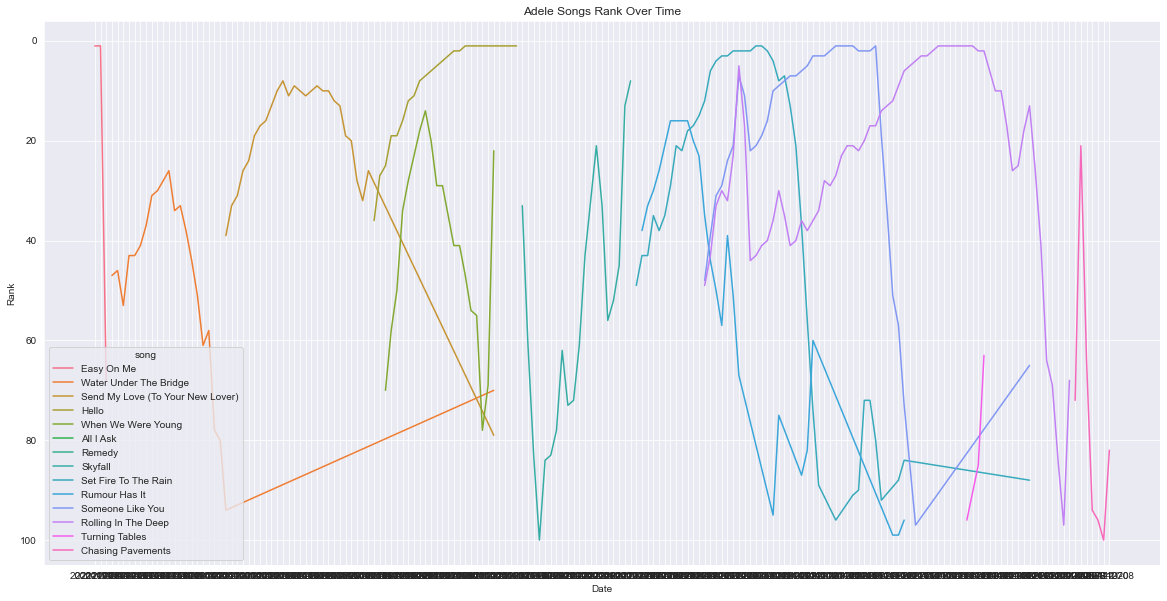

In [47]:
# Create the plot using seaborn
plt.figure(figsize=(20, 10))
sns.set_style("darkgrid")
sns.lineplot(x='date', y='rank', hue='song', data=Adele)
plt.gca().invert_yaxis()  # Reverse y-axis
plt.xlabel('Date')
plt.ylabel('Rank')
plt.title('Adele Songs Rank Over Time')
plt.show()